In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
from scipy.interpolate import make_interp_spline

In [40]:
results = r"D:\Projects\eruption-forecast\output\VG.OJN.00.EHZ\predictions\predictions_2025-07-28_2025-08-04.csv"
label = r"D:\Projects\eruption-forecast\output\VG.OJN.00.EHZ\predictions\features\future_labels_2025-07-28_2025-08-04_ws-10-minutes.csv"

In [41]:
label_df = pd.read_csv(label, index_col="id")
label_df

,datetime
id,
0,2025-07-28 00:00:00
1,2025-07-28 00:10:00
2,2025-07-28 00:20:00
3,2025-07-28 00:30:00
4,2025-07-28 00:40:00
...,...
1147,2025-08-04 23:10:00
1148,2025-08-04 23:20:00
1149,2025-08-04 23:30:00


In [42]:
df = pd.read_csv(results, index_col="id")

In [43]:
df = df.merge(label_df, left_index=True, right_index=True)

In [44]:
df.index = pd.to_datetime(df["datetime"])

In [45]:
df.drop(columns=["datetime"], inplace=True)

In [52]:
df.columns

Index(['model_eruption_probability', 'model_uncertainty', 'model_confidence',
       'model_prediction', 'consensus_eruption_probability',
       'consensus_uncertainty', 'consensus_confidence',
       'consensus_prediction'],
      dtype='str')

In [83]:
new_df = df.rolling(window="6h").mean()

In [84]:
threshold = 0.7

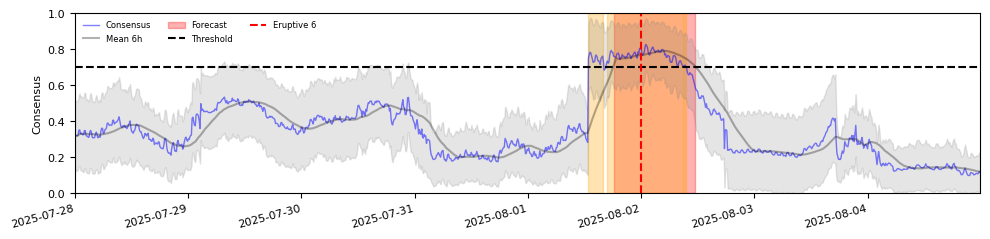

In [96]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 2.5))

ax.plot(df.index, df["model_eruption_probability"], color='blue', linewidth=1, label='Consensus', alpha=0.5)
ax.plot(new_df.index, new_df["model_eruption_probability"], color='k', linewidth=1.5, label='Mean 6h', alpha=0.3)

ax.fill_between(df.index, (df["model_eruption_probability"] - df["model_uncertainty"]), (df["model_eruption_probability"] + df["model_uncertainty"]), color="gray", alpha=0.2)
ax.fill_between(new_df.index, 0, 1.0, where=(df["model_eruption_probability"] > threshold), color='orange', alpha=0.3, zorder=-3)
ax.fill_between(new_df.index, 0, 1.0, where=(new_df["model_eruption_probability"] > threshold), color='red', alpha=0.3, label='Forecast', zorder=-4)

ax.set_ylim(0, 1.0)
ax.set_xlim(df.index[0], df.index[-1])
# ax.set_xlim(datetime.strptime("2025-07-31", "%Y-%m-%d"), datetime.strptime("2025-08-04", "%Y-%m-%d") )

ax.axhline(y=threshold, color='k', linestyle='--', linewidth=1.5, label='Threshold')
ax.set_ylabel('Consensus', fontsize=8)
ax.tick_params(labelsize=8)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))

#ax.axvline(datetime.strptime("2025-04-22", '%Y-%m-%d'), color='red', linestyle='--', label="Eruptive 2")
#ax.axvline(datetime.strptime("2025-05-18", '%Y-%m-%d'), color='red', linestyle='--', label="Eruptive 3")
#ax.axvline(datetime.strptime("2025-06-17", '%Y-%m-%d'), color='red', linestyle='--', label="Eruptive 4")
# ax.axvline(datetime.strptime("2025-07-07", '%Y-%m-%d'), color='red', linestyle='--', label="Eruptive 5")
ax.axvline(datetime.strptime("2025-08-02", '%Y-%m-%d'), color='red', linestyle='--', label="Eruptive 6")
# ax.axvline(datetime.strptime("2025-08-17", '%Y-%m-%d'), color='red', linestyle='--', label="Eruptive 7")
# ax.grid(False)
ax.legend(loc='upper left', ncol=3, fontsize=6, frameon=False)
# ax.legend(loc='upper right', ncol=3, fontsize=8, frameon=False)

for label in ax.get_xticklabels(which="major"):
    label.set(rotation=15, horizontalalignment="right")

plt.tight_layout()
plt.savefig("output/2026-01-13_OJN_DT_forecast_2025-07-22_2025-08-22_new_.png", dpi=300)